# Домашнее задание №3

Задание присылать на обе почты почты aleksartamonov@gmail.com dashkov.alexander.om@gmail.com в виде ссылки на colab

В теме письма указать **CV_HSE_2021 HW3 <Фамилия Имя>**

soft deadline: 21.03.2021T23:59:00+0300

hard deadline: 28.03.2021T23:59:00+0300


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import ipywidgets as widgets
import os

## Legacy классификация

**Задане 1 (10 баллов)**

Реализуйте функцию, которая строит банк фильтров Габора.
Реализуйте интерактивный инструмент, в котором с помощью 2-х ползунков, один из которых отвечает за угол, другой за масштаб для фильтров из банка, можно выбрать конкретный фильтр и на экране отобразятся:
- Фильтр в пространственной области
- Фильтр в частотном пространстве
- Результат применения этого фильтра к какому-нибудь изображению.

In [ ]:
def gabour_bank(size, phi_bins, scale_bins, max_scale, min_scale):
    """
    Parameters:
    size (tuple|int): Size or radius of filters.
    phi_bins (int): Number of angle beens of bank
    scale_bins (int): Number of scales betwwen max_scale and min_scale
    max_scale (float): Max frequency covered by bank
    min_scale (float): Min frequency covered by bank
    Returns:
    list: a list of filters
    """
    angles = np.linspace(0, np.pi, num=phi_bins, endpoint=False) 
    frequences = np.linspace(min_scale, max_scale, num=scale_bins)

    gabour_bank = np.empty(shape=(phi_bins, scale_bins, size, size))
    for i, angle in enumerate(angles):
        for j, freq in enumerate(frequences):
            gabour = cv2.getGaborKernel(ksize=(size, size), sigma=4, theta=angle, lambd=freq, gamma=0.5)
            gabour_bank[i, j] = gabour

    return gabour_bank


In [ ]:
def show_gabour(filter, fourier_filter, img, size=3):
    fig, ax = plt.subplots(1, 3, figsize=(4.5 * size, size))
    ax[0].set_title('Filter')
    ax[0].set_axis_off()
    ax[0].imshow(filter, cmap='gray')
    
    ax[1].set_title('Filter Fourier transform')
    ax[1].set_axis_off()
    ax[1].imshow(fourier_filter, cmap='gray')
    
    ax[2].set_title('Image filter application')
    ax[2].set_axis_off()
    img = cv2.filter2D(img, cv2.CV_8UC3, filter)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[2].imshow(img, cmap='gray')

def shift_fft(filter):
    filter = np.fft.fft2(filter)
    filter = np.abs(np.fft.fftshift(filter))
    filter = np.log(filter + 1e-10)

    return filter

In [ ]:
img = cv2.imread('zebry.jpg', 0)

size = 101
phi_bins = 50
scale_bins = 100
min_scale = 0.1
max_scale = 30


bank = gabour_bank(size, phi_bins, scale_bins, max_scale, min_scale)
angles = np.linspace(0, np.pi, num=phi_bins, endpoint=False) 
frequences = np.linspace(min_scale, max_scale, num=scale_bins)
indexes = {(str(angles[i]), str(frequences[j])): (i, j) for i in range(phi_bins) for j in range(scale_bins)}

@widgets.interact(lambd=widgets.SelectionSlider(options=frequences), angle=widgets.SelectionSlider(options=angles), )
def interact_gabour(lambd=frequences, angle=angles):
    i, j = indexes[(str(angle), str(lambd))]
    gabour = bank[i, j]
    fourier = shift_fft(gabour)
    show_gabour(gabour, fourier, img, size=4)

interactive(children=(SelectionSlider(description='lambd', options=(0.1, 0.40202020202020206, 0.70404040404040…

**Задание 2 (15 баллов)** 

Постройте мешок визульных слов на основе SIFT дескртипторов для датасета из третьего задания. Для этого для каждой картинки примените функцию, которая извлекает sift keypoints с дексрипторами, для каждой картинки ограничьтесь, например, сотней. Проведите кластеризацию на N(~30) классов, для каждого кластра отбразите в ряду 5 ближайших к нему участков изображений, в соответствии с масштабом keypoint-а. отобразите N таких строк.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp /content/drive/MyDrive/Daria/sirius-traffic-lights-competition.zip /content

In [8]:
!unzip -q sirius-traffic-lights-competition.zip

In [45]:
def show(imgs, shape=None, title=None):
    imgs = imgs if isinstance(imgs, list) else [imgs]
    shape = (len(imgs),1) if shape is None else shape

    for i, img in enumerate(imgs):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(*shape, i+1)
        plt.axis('off')
        plt.imshow(img)

In [43]:
path = '/content/test/pic'
imgs = []

for img in os.listdir(path):
    imgs.append(cv2.imread(path + '/' + img))


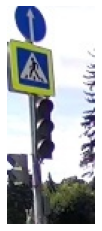

In [54]:
i = np.random.randint(len(imgs))
show(imgs[i])

**Задание 3 (20 баллов)**

[КОНКУРС](https://youtu.be/8GGWedu77SA?t=3388)

В этом задании вам придется проявить изобретательность. Используйте банки фильтов, мешки визуальных слов и гистрограммы для достижения максимального скора. [Настоящая ссылка на конкурс](https://www.kaggle.com/t/65dc3b38e1194d488ab276752fd1e92d). В этом задании баллы будут распределяться согласно тому, как далеко вы продвинулись на лидерборде. **Важное условие**, весь ваш код положите в этот ноутбук, в нем не должно быть нейросетей =) Только legacy только *hard core*